In [1]:
import os
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
path=f"C:/Workplace/C++/d2ome_v2/v2/v2/bin/Debug/"  
protiens=np.unique([x for x in os.listdir(path) if (("_MOUSE.csv" in x) and ("RSS_comparision_" in x))])
print(len(protiens))

data=pd.DataFrame()
for file in protiens:
    data=pd.concat([data,pd.read_csv(path+file)])
print(data.shape)

data=data.dropna()

# data.RSS_compelete=data.RSS_compelete**0.5
# data.RSS_FirstThree=data.RSS_FirstThree**0.5


744
(7272, 12)


In [3]:
data.describe()

,charge,Abundance,RSS_compelete,RSS_FirstThree,MAP_C,MAP_P,L1_distance_C,L1_distance_p,sap_c,sap_p
count,7138.000000,7.138000e+03,7.138000e+03,7.138000e+03,7138.000000,7138.000000,7138.000000,7138.000000,7138.000000,7138.000000
mean,2.491174,4.971773e+08,2.456794e-04,9.625337e-04,15.128104,6.965958,0.080219,0.082117,0.310990,0.278638
std,0.660962,2.025676e+09,8.500754e-04,4.647973e-03,15.117618,11.685546,0.106425,0.124010,0.441919,0.467422
min,2.000000,6.532006e+05,3.671392e-08,4.693333e-09,0.377973,0.025548,0.001076,0.000292,0.004025,0.001022
25%,2.000000,2.221511e+07,1.161517e-05,2.520208e-05,6.770975,1.914694,0.025097,0.023589,0.093307,0.076588
50%,2.000000,7.352207e+07,4.129366e-05,8.557048e-05,11.866723,3.539835,0.047286,0.043062,0.171929,0.141593
75%,3.000000,2.732048e+08,1.634526e-04,3.525870e-04,18.542841,7.108245,0.092637,0.088401,0.352267,0.284330
max,6.000000,7.353005e+10,1.881577e-02,1.095966e-01,259.266071,198.754285,1.336539,1.598410,6.413375,7.950171


1 L1_distance
===

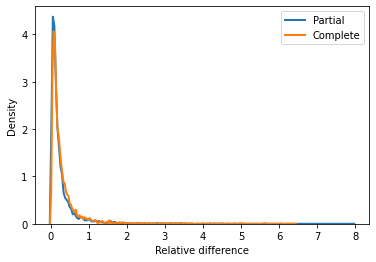

In [4]:
import seaborn as sns
from matplotlib import pyplot as plt

sns.distplot(data.sap_p, hist = False,bins=10, kde = True,hist_kws={'edgecolor':'black'},
                 kde_kws = {'shade': False, 'linewidth': 2,'bw_adjust':0.1} ,
            label=r'Partial')
sns.distplot(data.sap_c, hist = False,bins=10, kde = True,hist_kws={'edgecolor':'black'},
                 kde_kws = {'shade': False, 'linewidth': 2,'bw_adjust':0.1} ,
            label=r'Complete')
plt.xlabel("Relative difference")
plt.legend()

Text(0, 0.5, 'Complete')

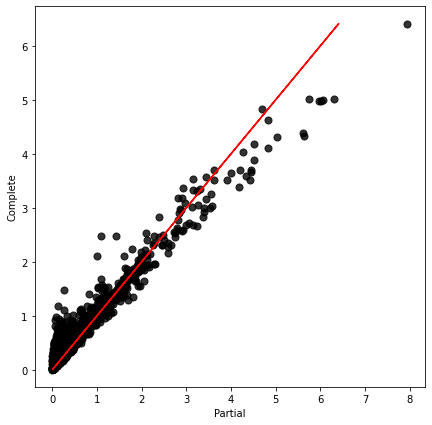

In [5]:
plt.figure(figsize=(7,7))
plt.scatter(data.sap_p,data.sap_c,c='k',s=50,alpha=0.8)
plt.plot(data.sap_c,data.sap_c,c='r')
plt.xlabel("Partial")
plt.ylabel("Complete")

In [ ]:
# fig, ax = plt.subplots(figsize=(6, 6))
# sns.kdeplot(
#     data.sap_p,data.sap_c,
#     levels=5,
#     fill=True,
#     alpha=0.6,
#     cut=2,
#     ax=ax,
# )


sns.jointplot(data.sap_p,data.sap_c)

0.01 Threshold
===

In [ ]:
print('L1_distance_C_Complete < 0.01 =>',"{0:0.2f}%".format(data[data.sap_c<0.01].shape[0]*100/data.shape[0]))
print('L1_distance_p_Partial < 0.01 => ',"{0:0.2f}%".format(data[data.sap_p<0.01].shape[0]*100/data.shape[0]))

Compelete profile > 0.01 and Partial profile < 0.01
==

In [ ]:
"{0:0.2f}%".format(data.query(' sap_c>0.01 and sap_p<0.01').shape[0]*100/data.shape[0])

0.1 Threshold
===

In [ ]:
print('L1_distance_C_Complete < 0.1 =>',"{0:0.2f}%".format(data[data.L1_distance_C<0.1].shape[0]*100/data.shape[0]))
print('L1_distance_p_Partial < 0.1 => ',"{0:0.2f}%".format(data[data.L1_distance_p<0.1].shape[0]*100/data.shape[0]))

Compelete profile > 0.1 and Partial profile < 0.1
===

In [ ]:
"{0:0.2f}%".format(data.query(' sap_c>0.1 and sap_p<0.1').shape[0]*100/data.shape[0])

In [ ]:
"{0:0.2f}%".format(data.query('sap_c < sap_p').shape[0]*100/data.shape[0])

In [ ]:
"{0:0.2f}%".format(data.query('sap_p < sap_c').shape[0]*100/data.shape[0])

In [ ]:
"{0:0.2f}%".format(data.query('sap_c == sap_p').shape[0]*100/data.shape[0])